Q1: What is Boosting in Machine Learning? Explain how it improves weak learners.

Answer:
Boosting is an ensemble learning technique that combines multiple weak learners (models that perform slightly better than random guessing) to build a strong learner.

Works sequentially: each new model focuses on correcting the mistakes of the previous ones.

Improves weak learners by assigning higher weights to misclassified samples, forcing the next model to pay more attention to them.

Final prediction is a weighted majority vote (classification) or weighted sum (regression).









Q2: Difference between AdaBoost and Gradient Boosting

Answer:

AdaBoost (Adaptive Boosting):

Adjusts weights of samples based on errors.

Emphasizes misclassified data points.

Combines weak learners using weighted voting.

Gradient Boosting:

Optimizes a loss function by fitting new learners to the residual errors of previous models.

Uses gradient descent to minimize error.

More flexible (works with custom loss functions).


Q3: How does regularization help in XGBoost?

Answer:

XGBoost adds L1 (Lasso) and L2 (Ridge) regularization to its objective function.

Helps by:

Preventing overfitting by penalizing large coefficients.

Encouraging sparsity (feature selection).

Improving generalization performance.


Q4: Why is CatBoost efficient for categorical data?

Answer:

CatBoost uses ordered target encoding and permutation-driven techniques for categorical variables.

Eliminates need for heavy preprocessing like one-hot encoding.

Handles high-cardinality categorical features efficiently.

Reduces overfitting by avoiding “target leakage.”


Q5: Real-world applications where boosting > bagging

Answer:
Boosting is preferred when accuracy is more important than speed:

Finance: Credit scoring, fraud detection.

Healthcare: Disease prediction using complex patient data.

Marketing: Customer churn prediction.

Search Engines: Ranking algorithms.

Image Recognition: Face detection (AdaBoost used in early systems).



In [7]:
#Q6: Python — AdaBoost Classifier (Breast Cancer dataset)
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))





AdaBoost Accuracy: 0.9707602339181286


In [6]:
#Q7: Python — Gradient Boosting Regressor (California Housing)
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))




R² Score: 0.8004451261281281


In [5]:
#Q8: Python — XGBoost Classifier + GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

X, y = load_breast_cancer(return_X_y=True)

param_grid = {"learning_rate": [0.01, 0.1, 0.2]}
grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric="logloss"), param_grid, cv=5)
grid.fit(X, y)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)




/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:53:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:53:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:53:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:53:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:53:56] WARNING: /w

Best Parameters: {'learning_rate': 0.2}
Best Accuracy: 0.9736376339077782


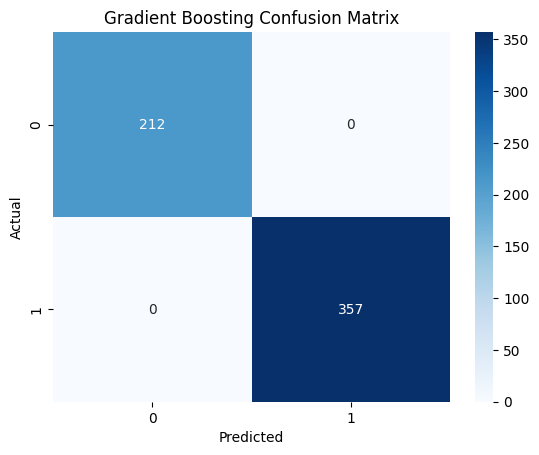

In [3]:
#Q9: Python — CatBoost Classifier + Confusion Matrix from catboost import CatBoostClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X, y)

y_pred = gb.predict(X)

cm = confusion_matrix(y, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Q10: Loan Default Prediction — Data Science Pipeline

Answer:

Data Preprocessing:

Handle missing values (imputation with mean/median for numeric, most frequent for categorical).

Encode categorical variables (CatBoost handles directly, XGBoost/LightGBM need encoding).

Scale numeric variables if needed.

Choice of Boosting Algorithm:

CatBoost → Best for mixed categorical/numeric features.

XGBoost → Strong performance for structured/tabular data.

AdaBoost → Baseline, but less efficient on high-dimensional data.

Hyperparameter Tuning:

Use GridSearchCV or RandomizedSearchCV for learning_rate, max_depth, n_estimators.

Apply early stopping.

Evaluation Metrics:

Use AUC-ROC, Precision-Recall, F1-score (better than just accuracy for imbalanced data).

Confusion matrix to interpret false positives/negatives.

Business Benefits:

More accurate prediction of loan defaults → reduces financial risk.

Helps in designing better credit policies.

Balances approval rate with minimizing losses.